# Data Exploration

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


## a)

In [3]:
df = pd.read_csv("C:/Users/Postb/Documents/GitHub/IDS/data/insurance_orig.csv")
rows, cols = df.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")


Rows: 1349
Columns: 7


## b)

,age,bmi,children,charges
count,1348.000000,1347.000000,1348.000000,1347.000000
mean,39.228487,30.655499,1.103858,13254.716622
std,14.063585,6.085427,1.217132,12096.109347
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4742.306100
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.637500,2.000000,16582.138605
max,64.000000,53.130000,7.000000,63770.428010


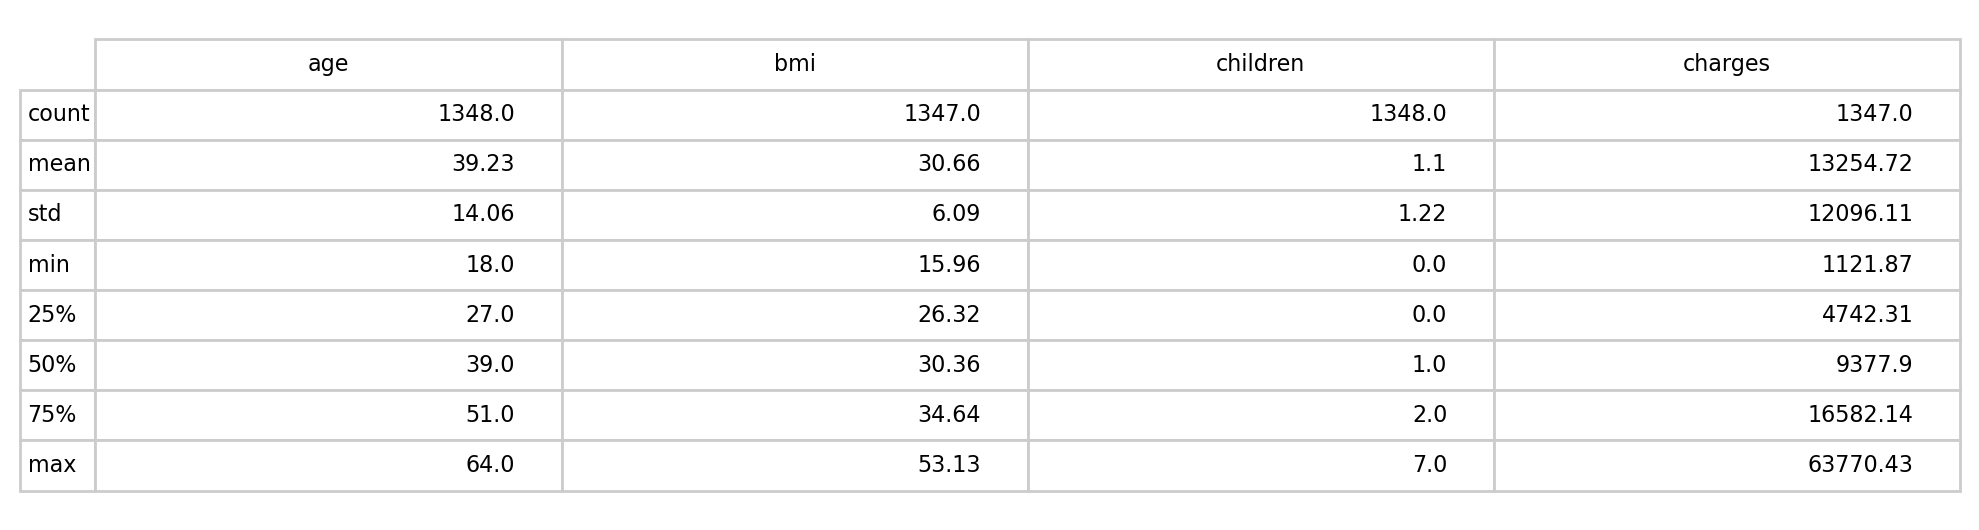

Saved describe() snapshot to artifacts\q1_describe_table.png


In [4]:
from pathlib import Path
from IPython.display import Image, display
summary_stats = df.describe()
display(summary_stats)

artifacts_dir = Path('artifacts')
artifacts_dir.mkdir(parents=True, exist_ok=True)
image_path = artifacts_dir / 'q1_describe_table.png'

fig, ax = plt.pyplot.subplots(figsize=(10, 2.75))
ax.axis('off')
table = ax.table(
    cellText=summary_stats.round(2).values,
    rowLabels=summary_stats.index,
    colLabels=summary_stats.columns,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.3)
for cell_obj in table.get_celld().values():
    cell_obj.set_edgecolor('#cccccc')
fig.tight_layout()
fig.savefig(image_path, dpi=200, bbox_inches='tight')
plt.pyplot.close(fig)

display(Image(filename=str(image_path)))
print(f"Saved describe() snapshot to {image_path}")


The table above comes from `df.describe()` and is also saved as `artifacts/q1_describe_table.png`, which you can attach as the requested screenshot.
Only the numeric attributes (age, bmi, children, charges) appear because pandas defaults to summarizing numeric dtypes; categorical features such as `sex`, `smoker`, and `region` require `include="all"` to see their stats.
Notice how the `count` row is below 1,349 for every numeric column (e.g., bmi = 1,347), which confirms the missing instances mentioned in the previous subtask.


## c)

In [5]:
from IPython.display import display

df_complete = df.dropna().copy()
complete_rows = len(df_complete)
print(f"Complete-case rows: {complete_rows} / {len(df)} ({complete_rows / len(df):.1%})")
display(df_complete.head())


Complete-case rows: 1338 / 1349 (99.2%)


,age,sex,bmi,children,smoker,region,charges
0,23.0,male,23.845,0.0,no,northeast,2395.17155
1,60.0,female,36.005,0.0,no,northeast,13228.84695
2,34.0,female,31.920,1.0,yes,northeast,37701.87680
3,19.0,female,28.600,5.0,no,southwest,4687.79700
4,19.0,male,20.425,0.0,no,northwest,1625.43375


## d)

In [7]:
import numpy as np

bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = ['underweight', 'normal weight', 'overweight', 'obese']
df['bmi_class'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
df_complete = df.dropna().copy()

bmi_counts = df_complete['bmi_class'].value_counts().reindex(bmi_labels, fill_value=0)
print("Patients per BMI class:")
display(bmi_counts.to_frame('count'))
print(len(df_complete))


Patients per BMI class:


,count
bmi_class,
underweight,20
normal weight,225
overweight,386
obese,707


1338


## e)

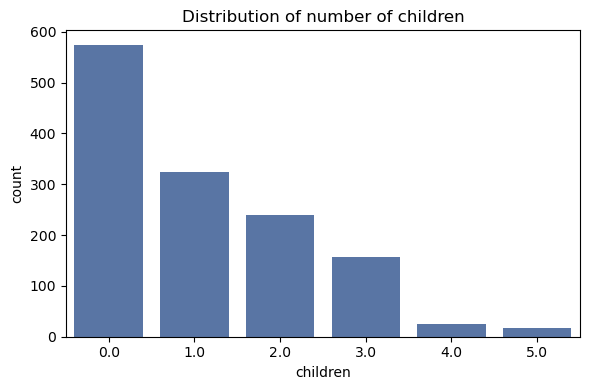

Mode of children: 0.0


In [22]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_complete, x='children', color='#4C72B0', ax=ax)
ax.set_title('Distribution of number of children')
ax.set_xlabel('children')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

children_mode = df_complete['children'].mode().iloc[0]
print(f"Mode of children: {children_mode}")


## f)

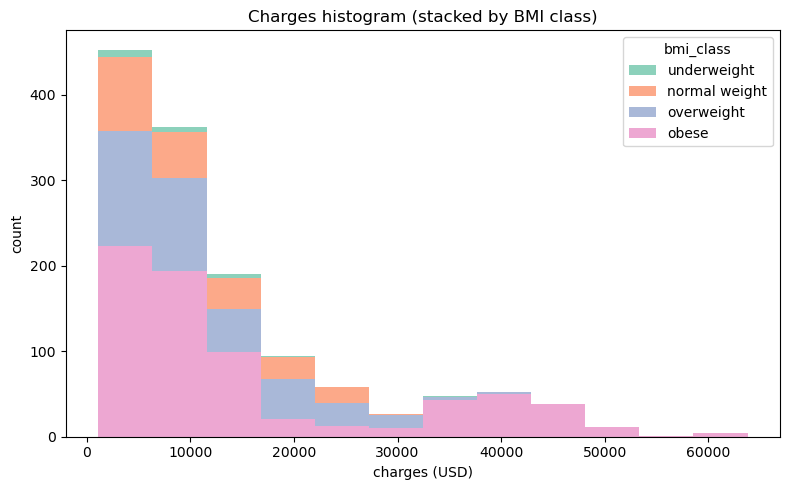

Saved histogram to artifacts\q1_charges_hist.png using 12 equal-width bins (Sturges' rule).


In [23]:
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np

n_bins = int(np.ceil(np.log2(len(df_complete)) + 1))
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=df_complete,
    x='charges',
    hue='bmi_class',
    bins=n_bins,
    multiple='stack',
    palette='Set2',
    edgecolor='none',
    ax=ax,
)
ax.set_title('Charges histogram (stacked by BMI class)')
ax.set_xlabel('charges (USD)')
ax.set_ylabel('count')
plt.tight_layout()

hist_path = Path('artifacts/q1_charges_hist.png')
hist_path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(hist_path, dpi=200, bbox_inches='tight')
plt.show()

print(f"Saved histogram to {hist_path} using {n_bins} equal-width bins (Sturges' rule).")


## g)

## h)

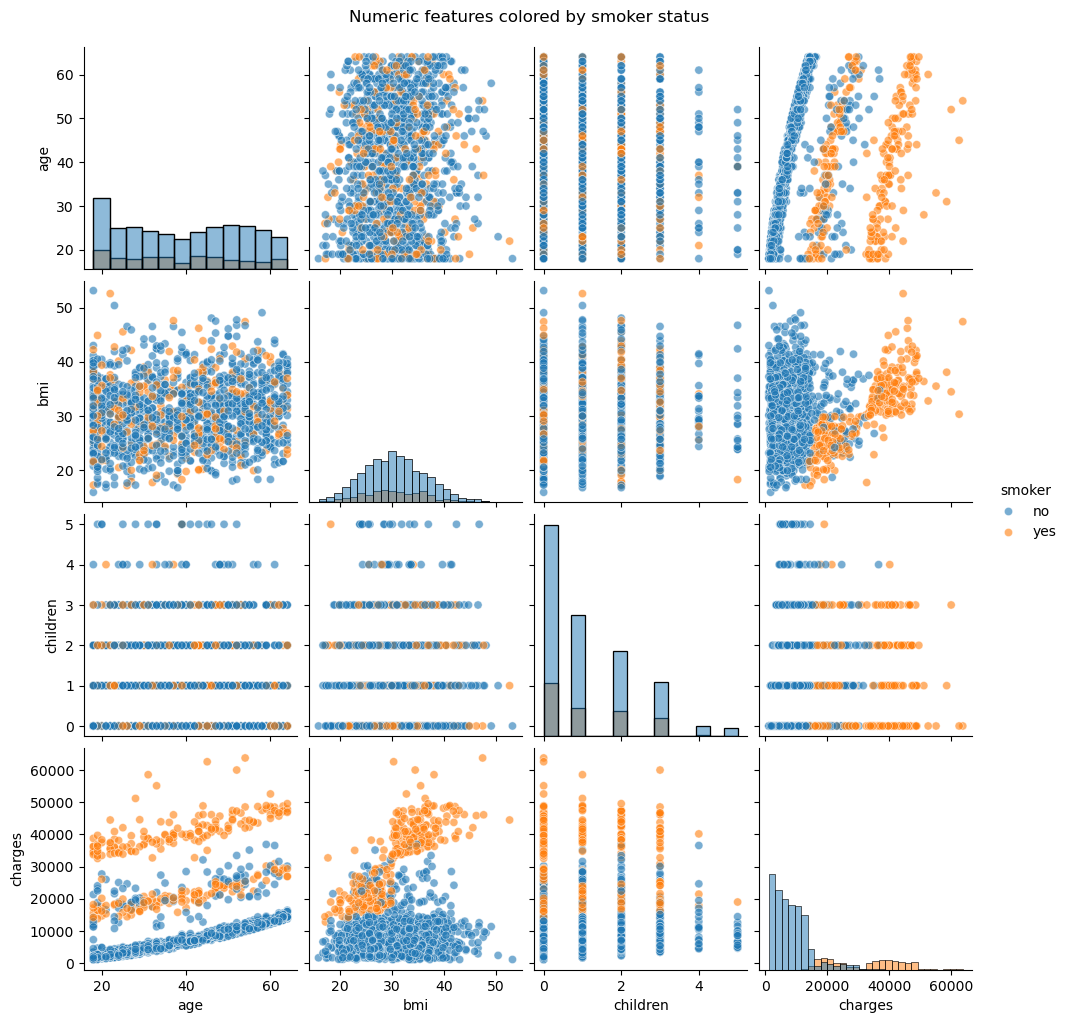

Saved pairplot to artifacts\q1_smoker_pairplot.png


In [9]:
from matplotlib import pyplot as plt
from pathlib import Path

pairplot = sns.pairplot(
    df_complete,
    vars=['age', 'bmi', 'children', 'charges'],
    hue='smoker',
    diag_kind='hist',
    plot_kws={'alpha': 0.6, 's': 35},
)
pairplot.fig.suptitle('Numeric features colored by smoker status', y=1.02)
pairplot_path = Path('artifacts/q1_smoker_pairplot.png')
pairplot.fig.savefig(pairplot_path, dpi=200, bbox_inches='tight')
plt.show()
print(f"Saved pairplot to {pairplot_path}")


## i)

,age,bmi,children,charges
age,1.000000,0.105607,0.044340,0.299541
bmi,0.105607,1.000000,0.011787,0.197291
children,0.044340,0.011787,1.000000,0.062017
charges,0.299541,0.197291,0.062017,1.000000


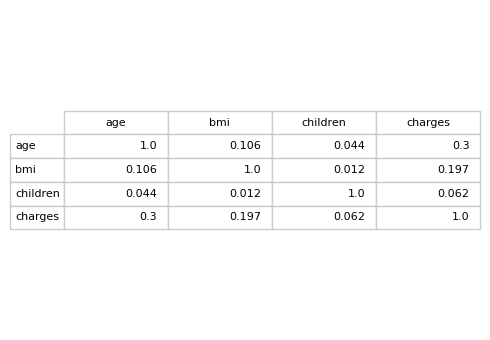

Saved correlation table to artifacts\q1_correlations.png


Strongest absolute correlation: **age vs. charges** = 0.300 (positive). As one increases, the other tends to increase.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from IPython.display import Markdown

num_cols = ['age', 'bmi', 'children', 'charges']
corr_matrix = df_complete[num_cols].corr()
display(corr_matrix)

fig, ax = plt.subplots(figsize=(5, 3.5))
ax.axis('off')
table = ax.table(
    cellText=corr_matrix.round(3).values,
    rowLabels=num_cols,
    colLabels=num_cols,
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.2)
for cell_obj in table.get_celld().values():
    cell_obj.set_edgecolor('#cccccc')
fig.tight_layout()

corr_path = Path('artifacts/q1_correlations.png')
corr_path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(corr_path, dpi=200, bbox_inches='tight')
plt.show()
print(f"Saved correlation table to {corr_path}")

abs_corr = corr_matrix.abs().copy()
np.fill_diagonal(abs_corr.values, np.nan)
strong_pair = abs_corr.stack().idxmax()
strong_value = corr_matrix.loc[strong_pair]
trend = 'positive' if strong_value > 0 else 'negative'

display(Markdown(
    f"Strongest absolute correlation: **{strong_pair[0]} vs. {strong_pair[1]}** = {strong_value:.3f} ({trend}). "
    + ("As one increases, the other tends to increase." if strong_value > 0 else "As one increases, the other tends to decrease.")
))


## j)